### exercise 1 linear regression  

### task 1 simple linear regression

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

In [2]:
# we already know that there are some rows in the data frame that contain question marks, indication missing values
# we need to mark them as na values
auto_df = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\Auto.csv',na_values='?')
# drop rows with na values
auto_df = auto_df.dropna() 

# Lets have a look at the data
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
X=sm.add_constant(auto_df.horsepower)
y=auto_df.mpg

model=sm.OLS(y,X) 
estimate=model.fit()

print(estimate.summary())
print('\n', estimate.ssr)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           7.03e-81
Time:                        09:45:42   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

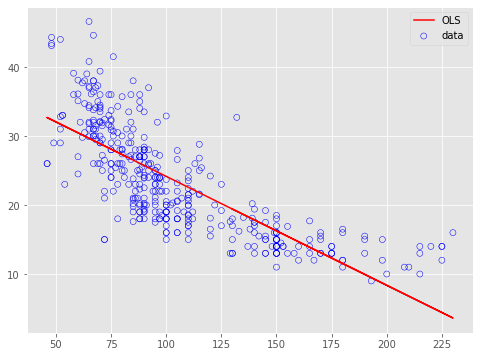

In [4]:
fig,ax = plt.subplots(figsize=(8,6))

ax.scatter(X.horsepower.values, y.values, facecolors='none', edgecolors='b', label="data");

ax.plot(X.horsepower.values, estimate.fittedvalues, 'r', label="OLS");

ax.legend(loc='best');

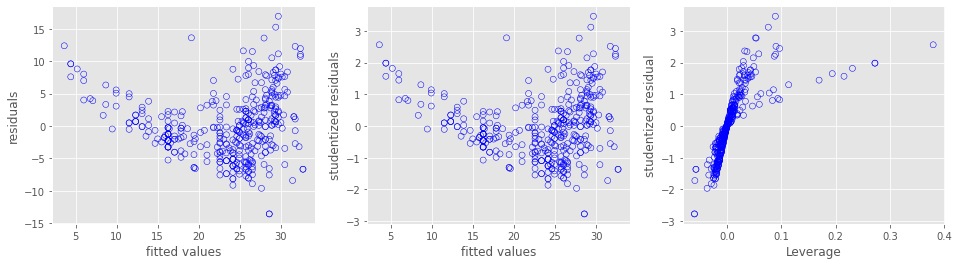

In [5]:
# Obtain the residuals, studentized residuals and the leverages
fitted_values = estimate.fittedvalues
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');

# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');

# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');

Comments:
- The residuals show a clear U-shape. This indicates a poor fit at the extremes of the fitted data.
- The studentized residuals show two outliers (>3) and the leverage plot has several values $> (p+1)/n=2/392=.005$ indicating high leverages which are altering the regression estimate. 
- A quadratic fit seems to be more appropriate: $mpg=\beta_0 + \beta_1  horsepower^2 + \epsilon$